<a href="https://colab.research.google.com/github/sokhunter/face_mask_detection_app/blob/YOLO-test/Entrenar_modelo_de_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenar modelo de YOLO con dataset custom

Hecho por: Renzo Damian
Dataset usado: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection. 
  
Creación del dataset modificado: https://colab.research.google.com/drive/1x-3i5KK6WwiPH_1InuyKwmXi4R_2sZNK?usp=sharing

## Conectar Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ingresamos a la carpeta donde se encuentra el dataset y guardaremos los pesos

In [2]:
%cd drive/MyDrive/YOLO

/content/drive/MyDrive/YOLO


## Clonamos y configuramos YOLO v5

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12408, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 12408 (delta 1), reused 6 (delta 1), pack-reused 12401
Receiving objects: 100% (12408/12408), 11.57 MiB | 5.71 MiB/s, done.
Resolving deltas: 100% (8626/8626), done.


In [4]:
%cd yolov5

/content/drive/MyDrive/YOLO/yolov5


In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 3.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Entrenaomos YOLO y guardamos los pesos

In [32]:
!python train.py --img 640 --batch 32 --epochs 40 --data ../data/facemask.yaml --weights yolov5s.pt --cache 

train: weights=yolov5s.pt, cfg=, data=../data/facemask.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-85-g6f4eb95 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, tran

## Mostrar resultados del entrenamietno

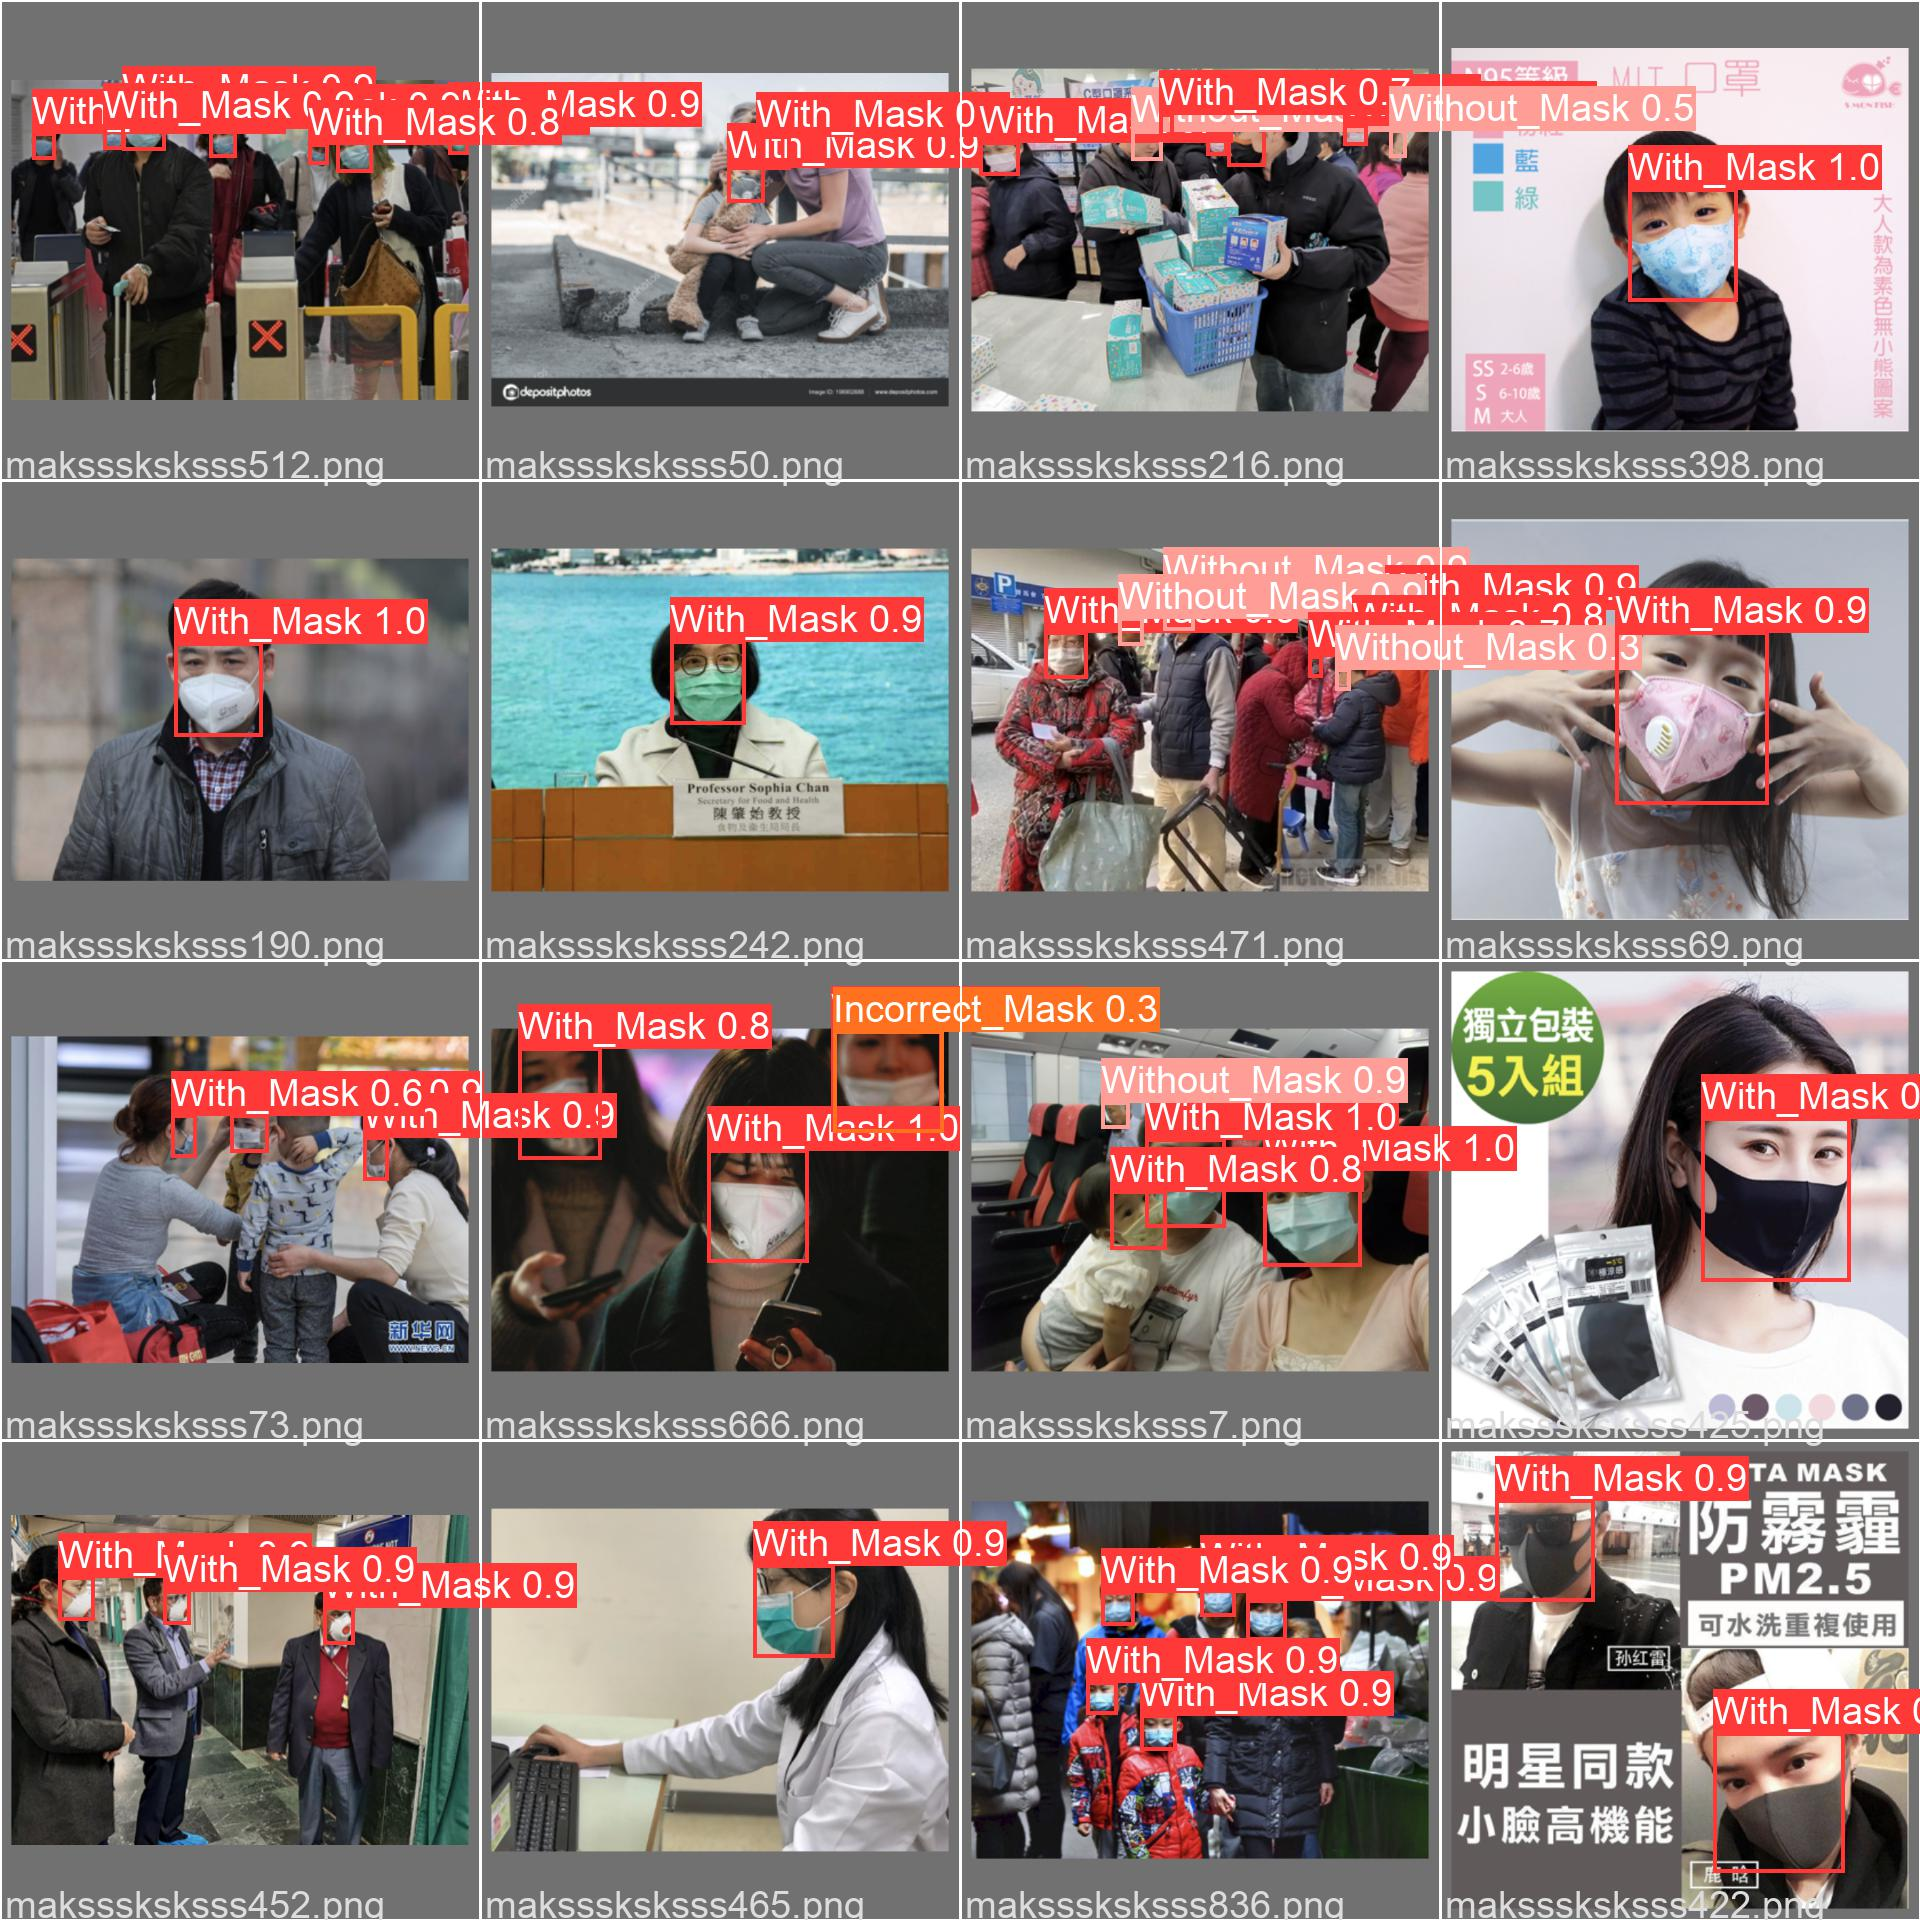

In [35]:
# display detected images
from IPython.display import Image
Image('../yolov5/runs/train/exp5/val_batch1_pred.jpg')

## Probar con una photo de internet

In [44]:
!wget https://thehill.com/sites/default/files/ca_maskspublic_061220getty.jpg

--2022-04-03 08:28:29--  https://thehill.com/sites/default/files/ca_maskspublic_061220getty.jpg
Resolving thehill.com (thehill.com)... 151.101.2.217, 151.101.130.217, 151.101.194.217, ...
Connecting to thehill.com (thehill.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 199612 (195K) [image/jpeg]
Saving to: ‘ca_maskspublic_061220getty.jpg’

ca_maskspublic_0612 100%[===================>] 194.93K  --.-KB/s    in 0.03s   

2022-04-03 08:28:29 (6.91 MB/s) - ‘ca_maskspublic_061220getty.jpg’ saved [199612/199612]



In [45]:
!python detect.py --source "./ca_maskspublic_061220getty.jpg" --weights './runs/train/exp5/weights/best.pt'

detect: weights=['./runs/train/exp5/weights/best.pt'], source=./ca_maskspublic_061220getty.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-85-g6f4eb95 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/YOLO/yolov5/ca_maskspublic_061220getty.jpg: 416x640 3 With_Masks, 7 Without_Masks, Done. (0.015s)
Speed: 0.4ms pre-process, 14.9ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


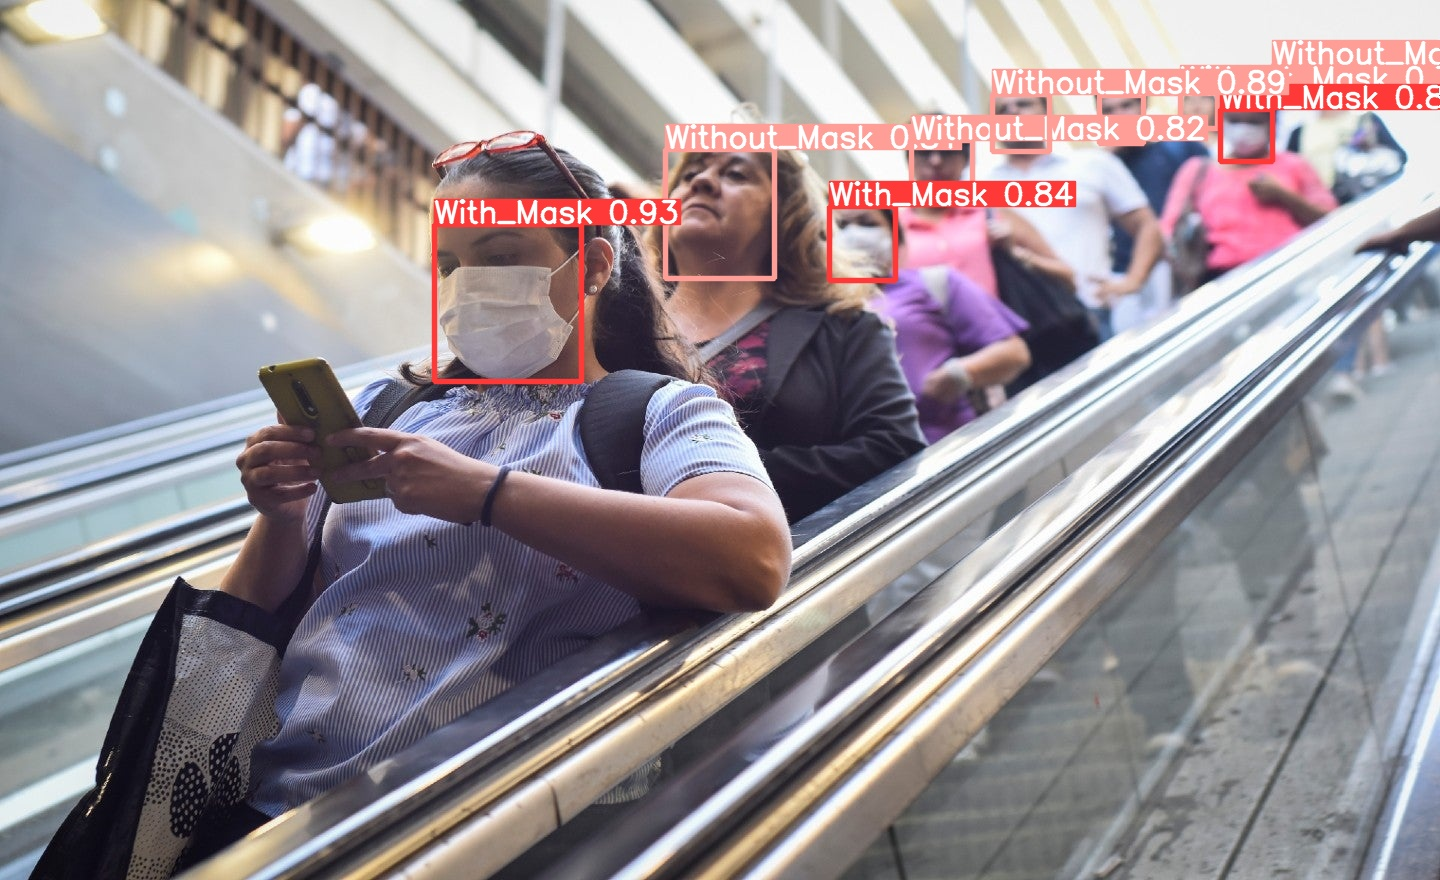

In [46]:
Image("./runs/detect/exp7/ca_maskspublic_061220getty.jpg")